In [2]:
! pip install -qq tensorflow tensorflow_addons

In [3]:
! pip install xgboost
! pip install imbalanced-learn
! pip install --upgrade scikit-learn
! pip uninstall imbalanced-learn --y
! pip install imbalanced-learn

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/63/ca/37b83f59b0efd919c03c52ad7e2473dced674f2f6eb07b9d6f7d80e4c54c/xgboost-2.0.2-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.2 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
  Obtaining dependency information for scikit-learn>=1.0.2 from https://files.pythonhosted.org/packages/d0/0b/26ad95cf0b747be967b15fb71a06f5ac67aba0fd2f9cd174de6edefc4674/scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached scikit_learn-1.

### restart the kernel for changes to reflect

Epoch 1/20
274/274 [==============================] - 1s 3ms/step - loss: 0.0436 - val_loss: 0.0169
Epoch 2/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0096 - val_loss: 0.0156
Epoch 3/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0085 - val_loss: 0.0164
Epoch 4/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0080 - val_loss: 0.0151
Epoch 5/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0077 - val_loss: 0.0149
Epoch 6/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0075 - val_loss: 0.0153
Epoch 7/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0072 - val_loss: 0.0165
Epoch 8/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0070 - val_loss: 0.0152
Epoch 9/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0068 - val_loss: 0.0147
Epoch 10/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0067 - val_loss: 0.0159

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f56b458a710>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


 Optimal Threshold: 0.015156049754731758
Classification Report for the Ensemble Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14948
           1       0.64      0.90      0.75        52

    accuracy                           1.00     15000
   macro avg       0.82      0.95      0.87     15000
weighted avg       1.00      1.00      1.00     15000



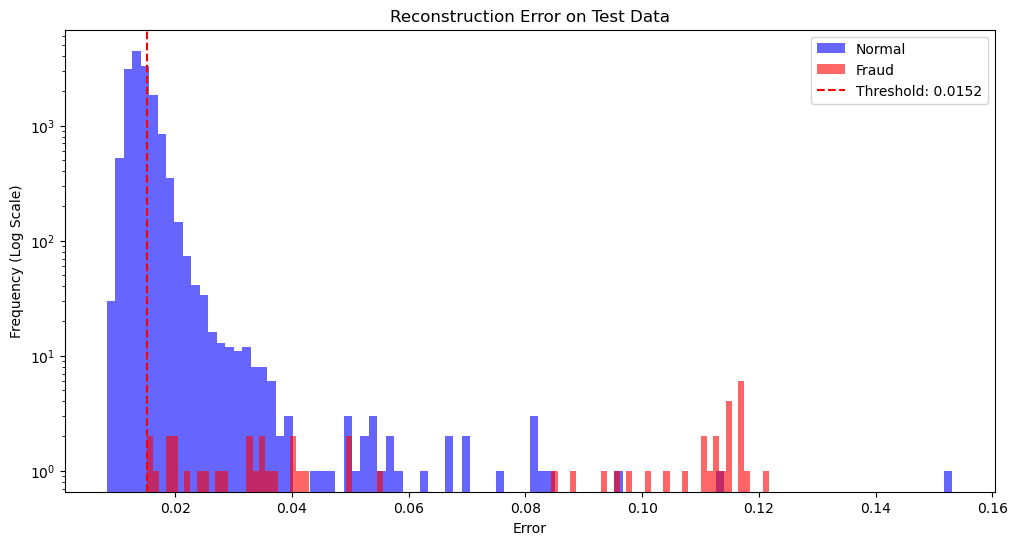

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
import xgboost as xgb
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
from sklearn.metrics import precision_recall_curve

# Load data
data = pd.read_csv('creditcard.csv')

# Split the dataset into train and test
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Normalize data & drop time column
train_data = train_data.drop("Time", axis=1)
normalized_train = (train_data - train_data.min()) / (train_data.max() - train_data.min())

test_data = test_data.drop("Time", axis=1)
normalized_test = (test_data - test_data.min()) / (test_data.max() - test_data.min())

train_x = normalized_train.drop("Class", axis=1).values
train_y = train_data["Class"].values

test_x = normalized_test.drop("Class", axis=1).values
test_y = test_data["Class"].values

# Create the autoencoder model
model = keras.Sequential(
    [
        keras.Input(shape=(29,)),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(29, activation="linear"),
    ]
)

optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.01)
model.compile(loss="mse", optimizer=optimizer)

model.fit(train_x, train_x, batch_size=128, epochs=20, validation_data=(test_x, test_x))

# Calculate reconstruction error
train_predictions = model.predict(train_x)
train_error = np.mean(np.square(train_x - train_predictions), axis=1)

test_predictions = model.predict(test_x)
test_error = np.mean(np.square(test_x - test_predictions), axis=1)

# Generate predictions and compute precision and recall for various thresholds
precisions, recalls, thresholds = precision_recall_curve(test_y, test_error)

# Adjust lengths of precision and recall arrays to match that of thresholds
precisions = precisions[:-1]
recalls = recalls[:-1]

# Cost values
cost_recall = 2000
cost_precision = 10

# Calculating total cost for each threshold
total_costs = []
for prec, rec in zip(precisions, recalls):
    total_cost = cost_recall * (1 - rec) + cost_precision * (1 - prec)
    total_costs.append(total_cost)

# Find the threshold with the minimum cost
min_cost = min(total_costs)
optimal_idx = total_costs.index(min_cost)
optimal_threshold = thresholds[optimal_idx]

threshold = optimal_threshold
print(f" Optimal Threshold: {threshold}")

# Identify anomalies based on the threshold
test_predictions_class = [1 if e > threshold else 0 for e in test_error]

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
train_x_resampled, train_y_resampled = smote.fit_resample(train_x, train_y)

# Train an XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=3, random_state=42)
xgb_model.fit(train_x_resampled, train_y_resampled)

# Predict using the XGBoost model
xgb_predictions = xgb_model.predict(test_x)


# Ensemble Decision: Require both models to agree on fraud
ensemble_predictions = [1 if auto == 1 and xgb == 1 else 0 for auto, xgb in zip(test_predictions_class, xgb_predictions)]

# Evaluation of the ensemble model
print("Classification Report for the Ensemble Model:")
print(classification_report(test_y, ensemble_predictions))

# Visualization
plt.figure(figsize=(12, 6))
plt.hist(test_error[test_y == 0], bins=100, label='Normal', color='blue', alpha=0.6, log=True)
plt.hist(test_error[test_y == 1], bins=100, label='Fraud', color='red', alpha=0.6)
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.4f}')
plt.title('Reconstruction Error on Test Data')
plt.xlabel('Error')
plt.ylabel('Frequency (Log Scale)')
plt.legend()
plt.show()

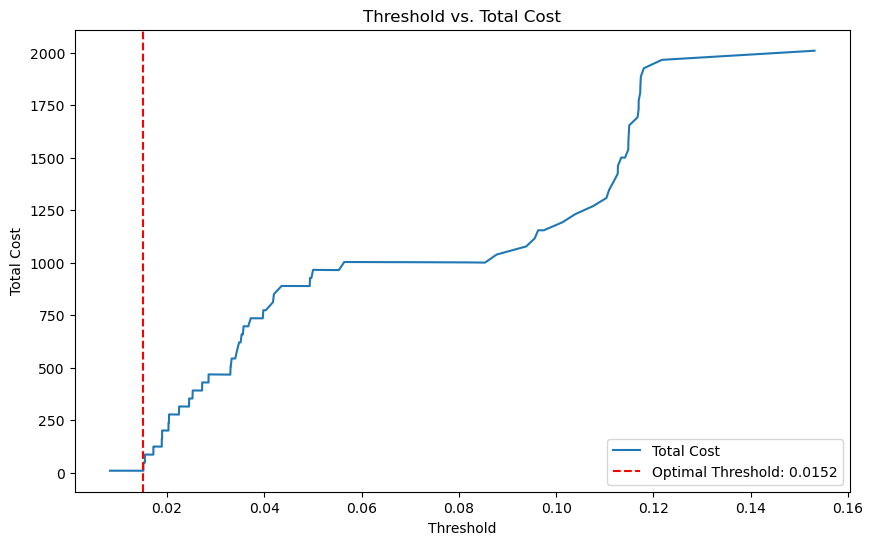

In [23]:
# Plotting the costs
plt.figure(figsize=(10, 6))
plt.plot(thresholds, total_costs, label='Total Cost')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {threshold:.4f}')
plt.title('Threshold vs. Total Cost')
plt.xlabel('Threshold')
plt.ylabel('Total Cost')
plt.legend()
plt.show()

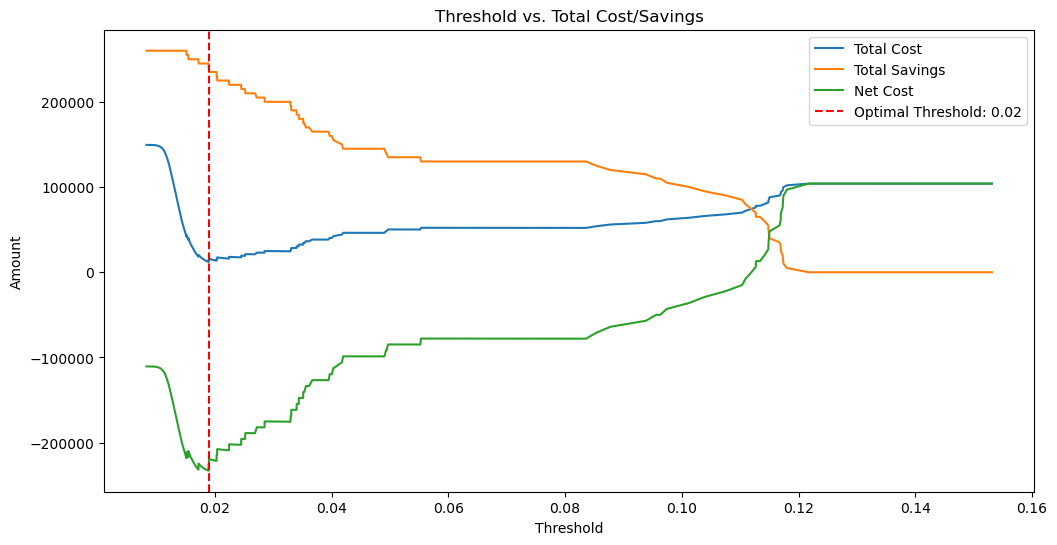

In [24]:
from sklearn.metrics import confusion_matrix

# Assuming an average saving value for correctly identified fraud cases
average_savings_per_correct_fraud = 5000  # assumption

# Initialize lists to store values
total_costs = []
total_savings = []
net_costs = []

for thresh in thresholds:
    # Classify as fraud or normal based on the threshold
    predicted_classes = [1 if e > thresh else 0 for e in test_error]
    
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(test_y, predicted_classes).ravel()
    
    # Calculate costs and savings
    cost = (fp * cost_precision) + (fn * cost_recall)
    savings = tp * average_savings_per_correct_fraud
    
    total_costs.append(cost)
    total_savings.append(savings)
    net_costs.append(cost - savings)

# Find the threshold with the minimum net cost
min_net_cost = min(net_costs)
optimal_idx = net_costs.index(min_net_cost)
optimal_threshold = thresholds[optimal_idx]

# Plotting the costs and savings
plt.figure(figsize=(12, 6))
plt.plot(thresholds, total_costs, label='Total Cost')
plt.plot(thresholds, total_savings, label='Total Savings')
plt.plot(thresholds, net_costs, label='Net Cost')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.title('Threshold vs. Total Cost/Savings')
plt.xlabel('Threshold')
plt.ylabel('Amount')
plt.legend()
plt.show()
